In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [54]:
df = pd.read_csv('problem_two.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [56]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [57]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [58]:
df.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [59]:
df.duplicated().sum()

0

## Histogram of Gym Attendance


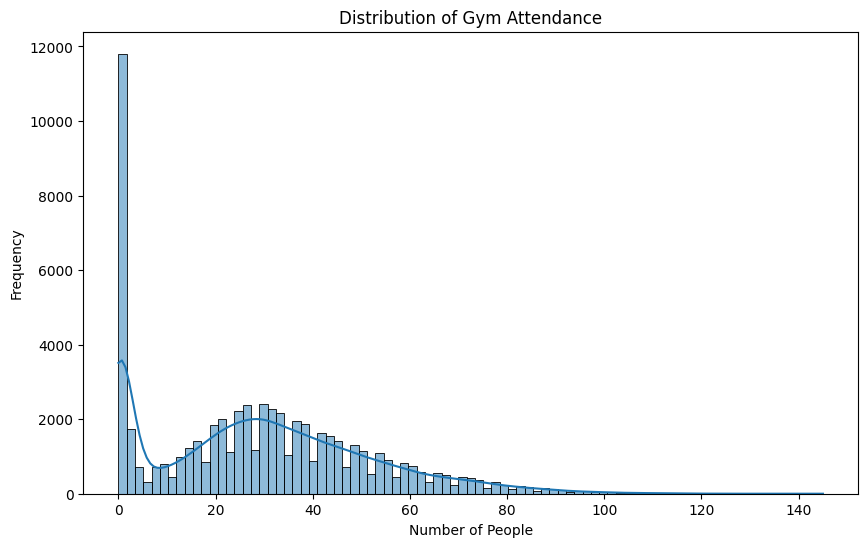

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['number_people'], kde=True)
plt.title('Distribution of Gym Attendance')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()


## Bar Plot of Average Gym Attendance by Day of the Week


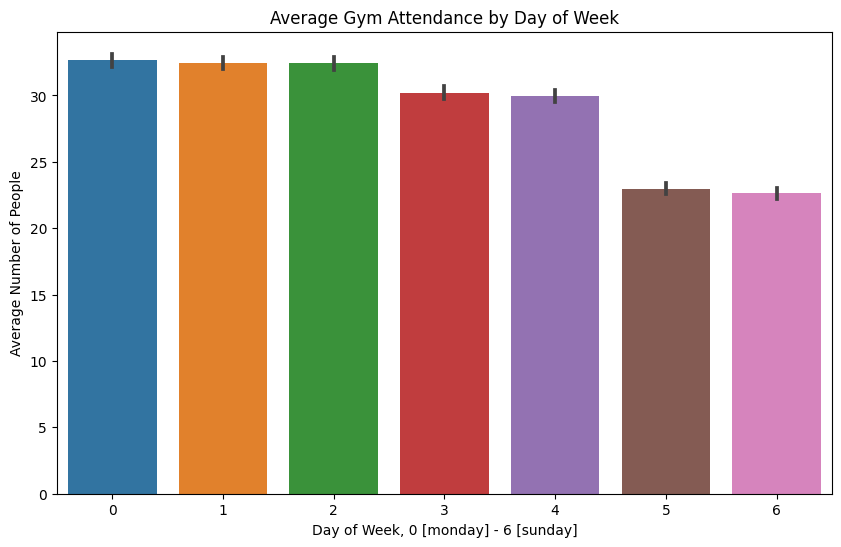

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='number_people', data=df)
plt.title('Average Gym Attendance by Day of Week')
plt.xlabel('Day of Week, 0 [monday] - 6 [sunday]')
plt.ylabel('Average Number of People')
plt.show()


## Box Plot for Attendance across Different Hours of the Day


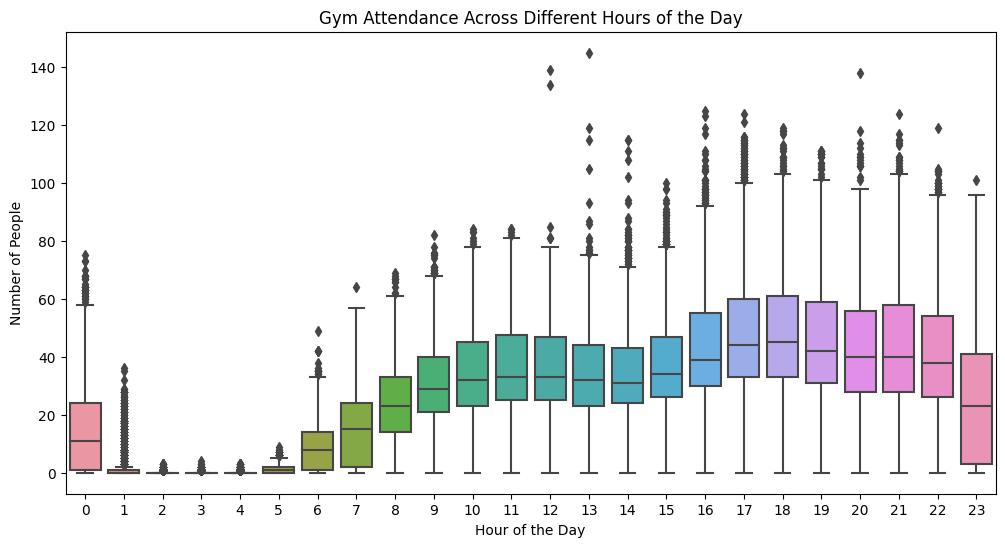

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='number_people', data=df)
plt.title('Gym Attendance Across Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of People')
plt.show()


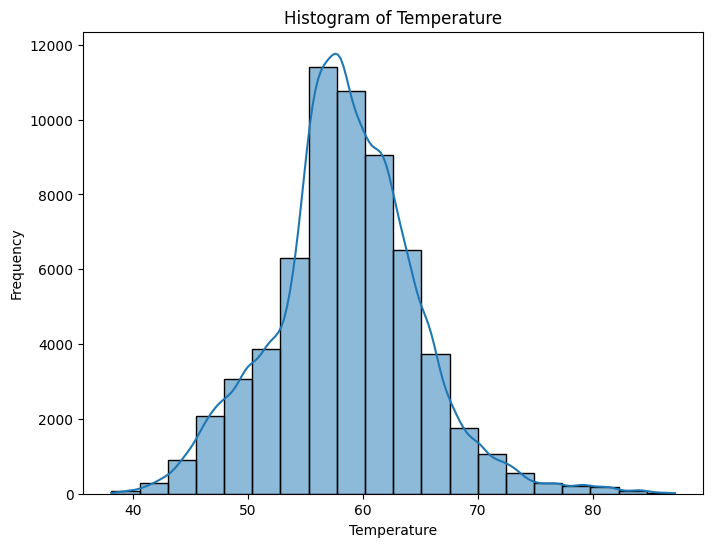

In [63]:
# Histogram of Temperature
plt.figure(figsize=(8, 6))
sns.histplot(df['temperature'], bins=20, kde=True)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

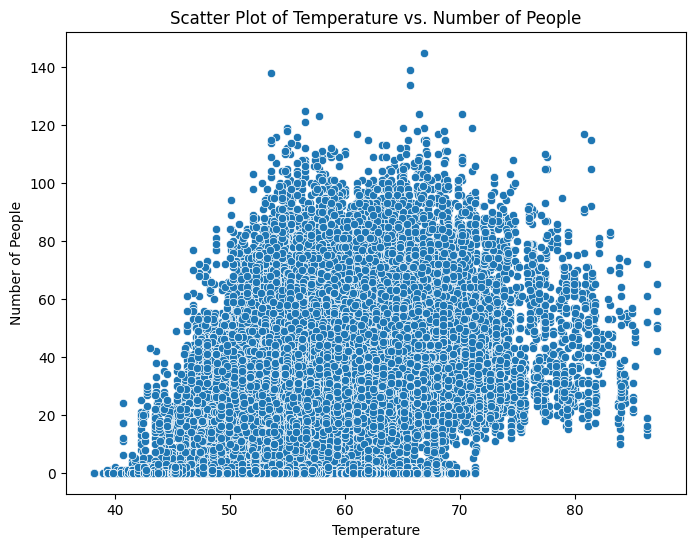

In [64]:
# Scatter Plot of Temperature vs. Number of People
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='number_people', data=df)
plt.title('Scatter Plot of Temperature vs. Number of People')
plt.xlabel('Temperature')
plt.ylabel('Number of People')
plt.show()

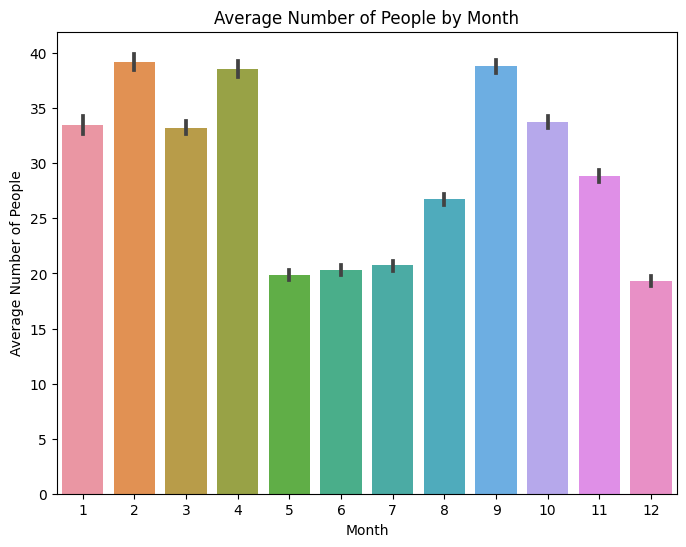

In [65]:
# Bar Plot of Average Number of People by Month
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='number_people', data=df)
plt.title('Average Number of People by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of People')
plt.show()


In [66]:
# Convert 'date' column to datetime and extract relevant features
df['date'] = pd.to_datetime(df['date'], utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

# Drop original 'date' and 'timestamp' columns as they are now redundant
df = df.drop(['date', 'timestamp'], axis=1)

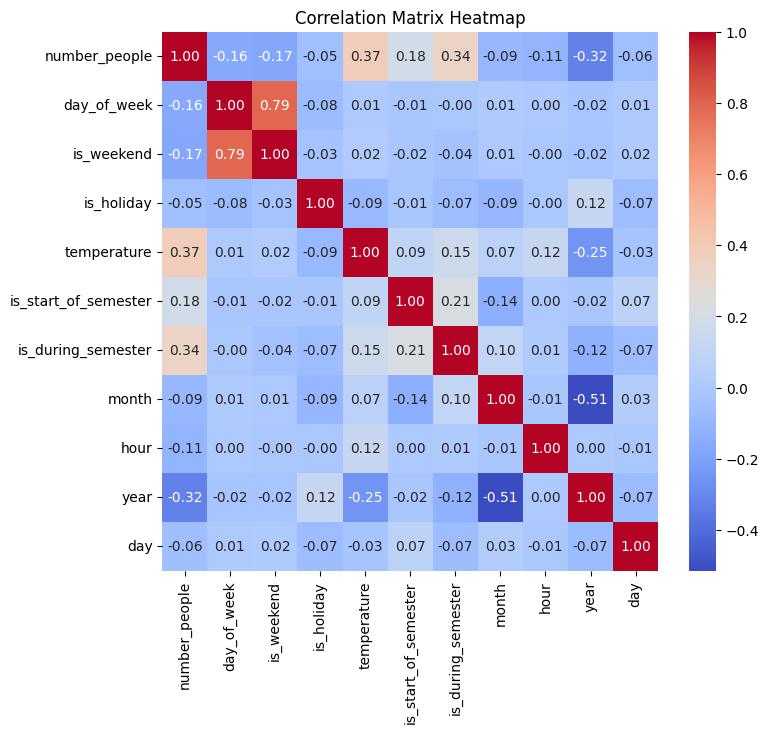

In [67]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [68]:
df.head(5)

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day
0,37,4,0,0,71.76,0,0,8,0,2015,15
1,45,4,0,0,71.76,0,0,8,0,2015,15
2,40,4,0,0,71.76,0,0,8,0,2015,15
3,44,4,0,0,71.76,0,0,8,0,2015,15
4,45,4,0,0,71.76,0,0,8,0,2015,15


In [69]:
data= df

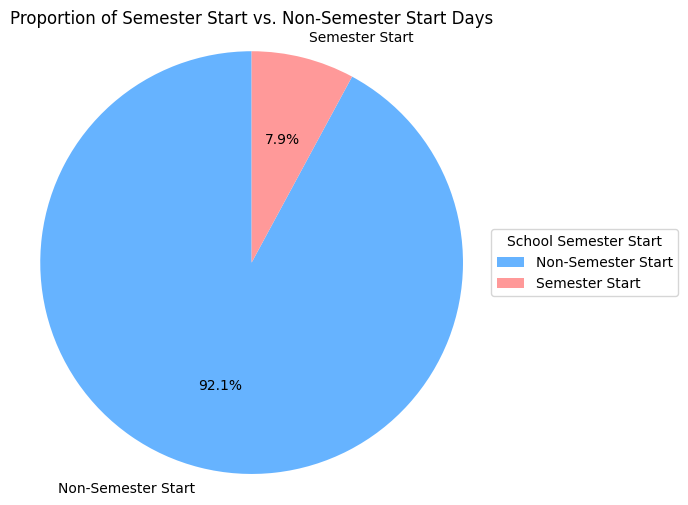

In [70]:
import matplotlib.pyplot as plt

# Count the number of days that are the start of the semester and those that are not
start_of_semester_count = df['is_start_of_semester'].sum()
non_start_of_semester_count = len(df) - start_of_semester_count

# Create a pie chart
labels = ['Non-Semester Start', 'Semester Start']
sizes = [non_start_of_semester_count, start_of_semester_count]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Semester Start vs. Non-Semester Start Days')
plt.axis('equal')

# Add legend with corrected label and place it outside the plot
plt.legend(title='School Semester Start', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


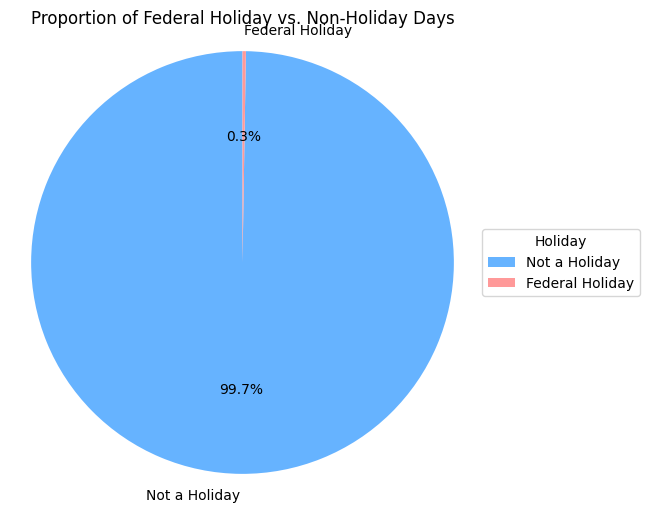

In [71]:
import matplotlib.pyplot as plt

# Count the number of days that are holidays and those that are not
holiday_count = df['is_holiday'].sum()
non_holiday_count = len(df) - holiday_count

# Create a pie chart
labels = ['Not a Holiday', 'Federal Holiday']
sizes = [non_holiday_count, holiday_count]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Federal Holiday vs. Non-Holiday Days')
plt.axis('equal')

# Add legend
plt.legend(title='Holiday', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [72]:
# Loop through each column
for column in df.columns:
    # Get the unique values for the column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in {column}:")
    print(unique_values)
    print()


Unique values in number_people:
[ 37  45  40  44  46  43  53  54  39  38  41  36  42  35  48  49  33  22
   2   1   0   3   6  15  18  21  26  23  28  30  32  29  34  27  31  25
  24  12  17   4  11  16  20  19  14   9  13  50  47  55  68  58  65  63
  74  69  60  73  52  66  64   7  10  61  51  62  56  71  72  67   5  70
  57  59   8  75 134 139 119 145 105  93 115 108 111 102  98  89  78  83
  84  77  80  81  87  88  92  76  82  79 104  96  91  94  86  90  85  95
 101 100 106 103 110 117 114 118  97  99 109 107 124 112 113 116 123 121
 125 138]

Unique values in day_of_week:
[4 5 6 0 1 2 3]

Unique values in is_weekend:
[0 1]

Unique values in is_holiday:
[0 1]

Unique values in temperature:
[71.76 72.15 69.97 ... 54.98 51.75 56.71]

Unique values in is_start_of_semester:
[0 1]

Unique values in is_during_semester:
[0 1]

Unique values in month:
[ 8  9 10 11 12  1  2  3  4  5  6  7]

Unique values in hour:
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23  9 10 11]

Uni

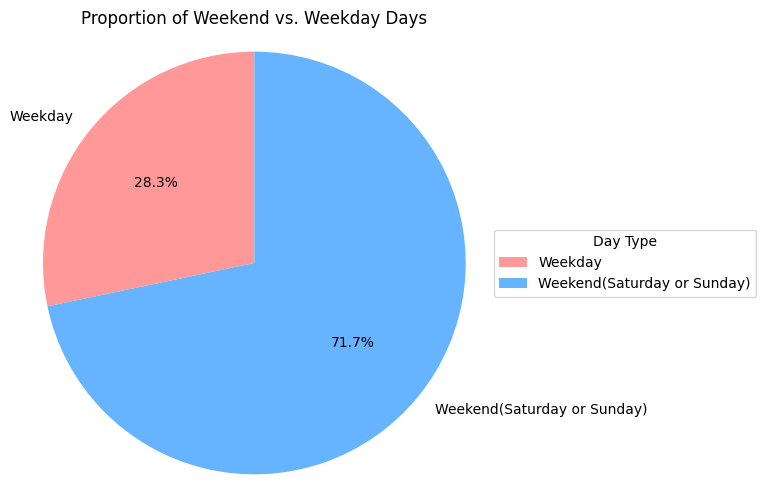

In [73]:
import matplotlib.pyplot as plt

# Count the number of weekend and weekday days
weekend_count = df['is_weekend'].sum()
weekday_count = len(df) - weekend_count

# Create a pie chart
labels = ['Weekday','Weekend(Saturday or Sunday)']
sizes = [weekend_count, weekday_count]
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Weekend vs. Weekday Days')
plt.axis('equal')

# Add legend
plt.legend(title='Day Type', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
# Split the data into training and testing sets
X = df.drop(columns=['number_people'])  # Features
y = df['number_people']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 299.55271939790623
Root Mean Squared Error (RMSE): 17.307591380602506


In [75]:

# Categorical and numerical features
categorical_features = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'month']
numeric_features = ['temperature', 'hour', 'year', 'day']

# Transformers for categorical and numerical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [76]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature', 'hour',
                                                   'year', 'day']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'is_weekend',
                                                   'is_holiday',
                                                   'is_start_of_semester',
                                                   'month'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [79]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Random Forest RMSE: {rmse}")


Mean Squared Error: 37.60931836420903
Random Forest RMSE: 6.132643668452377


In [78]:
feature_importances = model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


                   Feature  Importance
1                     hour    0.475534
0              temperature    0.114118
2                     year    0.105151
3                      day    0.074664
18                 month_2    0.024794
28                month_12    0.020512
11            is_weekend_0    0.019418
12            is_weekend_1    0.019318
24                 month_8    0.017810
17                 month_1    0.015671
20                 month_4    0.015205
15  is_start_of_semester_0    0.014240
16  is_start_of_semester_1    0.013247
8            day_of_week_4    0.011823
19                 month_3    0.011085
25                 month_9    0.008729
27                month_11    0.006780
10           day_of_week_6    0.005715
5            day_of_week_1    0.005173
9            day_of_week_5    0.004743
7            day_of_week_3    0.004363
4            day_of_week_0    0.003521
6            day_of_week_2    0.002571
26                month_10    0.002350
21                 month_

* Hour: 
    The most significant predictor. 
    This suggests that the time of day is crucial in predicting gym crowd levels.
* Temperature: Also a notable predictor, indicating that weather conditions significantly impact gym attendance.
* Year and Day: Reflect the long-term trend and specific day's impact, respectively.
* Month: Certain months (like February, December) have higher importance, likely due to seasonal variations or specific events during these times.
* Is Weekend and Is Start of Semester: These binary features show moderate importance, highlighting the impact of weekends and the academic calendar on gym attendance.